https://www.kaggle.com/code/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann/notebook

# Aim
This is a small yet useful kernel for providing an introduction to **Artificial Neural Networks** for people who want to begin their journey into the field of **deep learning**. For this, I have used Keras which is a high-level Neural Networks API built on top of low level neural networks APIs like Tensorflow and Theano. As it is high-level, many things are already taken care of therefore it is easy to work with and a great tool to start with. [Here's the documentation for keras](https://keras.io/)

# What is Deep learning?
Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example. Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost. It is the key to voice control in consumer devices like phones, tablets, TVs, and hands-free speakers. Deep learning is getting lots of attention lately and for good reason. It’s achieving results that were not possible before.


# What are artificial neural networks?
An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output. ANNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. ANN is also known as a neural network.


<img src="https://cdn-images-1.medium.com/max/1000/1*ZX05x1xYgaVoa4Vn2kKS9g.png">

A single neuron is known as a perceptron. It consists of a layer of inputs(corresponds to columns of a dataframe). Each input has a weight which controls the magnitude of an input.
The summation of the products of these input values and weights is fed to the activation function. Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.

They introduce non-linear properties to our Network.Their main purpose is to convert a input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.  Specifically in A-NN we do the sum of products of inputs(X) and their corresponding Weights(W) and apply a Activation function f(x) to it to get the output of that layer and feed it as an input to the next layer. [Refer to this article for more info.](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f)
<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Single-Perceptron.png">
**Concept of backpropagation** - Backpropagation, short for "backward propagation of errors," is an algorithm for supervised learning of artificial neural networks using gradient descent. Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights. It is a generalization of the delta rule for perceptrons to multilayer feedforward neural networks.
<img src="https://www.researchgate.net/profile/Hassan_Al-Haj_Ibrahim/publication/235338024/figure/fig6/AS:299794191929349@1448487913220/Flow-chart-for-the-back-propagation-BP-learning-algorithm.png">
**Gradient Descent** - To explain Gradient Descent I’ll use the classic mountaineering example. Suppose you are at the top of a mountain, and you have to reach a lake which is at the lowest point of the mountain (a.k.a valley). A twist is that you are blindfolded and you have zero visibility to see where you are headed. So, what approach will you take to reach the lake? The best way is to check the ground near you and observe where the land tends to descend. This will give an idea in what direction you should take your first step. If you follow the descending path, it is very likely you would reach the lake. [Refer to this article for more information.](https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/)

About Breast Cancer Wisconsin (Diagnostic) Data Set
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - ANN - DNN/2.Breast cancer classification

/content/drive/MyDrive/Machine learning 2024/Notebooks - ANN - DNN/2.Breast cancer classification


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
del data['Unnamed: 32']

In [ ]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(512, 30)

**Now that we have prepared data, we will import Keras and its packages.**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Need Dense layers for this task of breast cancer
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))  # 0 - 1   >=0.5 ? 1 , 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

input_dim - number of columns of the dataset

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN

When you use **kernel_initializer='uniform'**, it means that the weights of the layer are initialized by drawing random values from a uniform distribution. Specifically, the weights are initialized with values from a uniform distribution within a specific

output_dim is 1 as we want only 1 output from the final layer.

Sigmoid function is used when dealing with classfication problems with 2 types of results.(Submax function is used for 3 or more classification results)
<img src="https://cdn-images-1.medium.com/max/1000/1*Xu7B5y9gp0iL5ooBj7LtWw.png">

In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Optimizer is chosen as adam for gradient descent.

Binary_crossentropy is the loss function used.

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. [More about this](http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

In [ ]:
# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train,validation_split=0.2, batch_size=64, epochs=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions.

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5650 - loss: 0.6925 - val_accuracy: 0.6019 - val_loss: 0.6901
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6544 - loss: 0.6883 - val_accuracy: 0.6117 - val_loss: 0.6840
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6347 - loss: 0.6810 - val_accuracy: 0.6990 - val_loss: 0.6714
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7558 - loss: 0.6642 - val_accuracy: 0.8738 - val_loss: 0.6480
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8804 - loss: 0.6360 - val_accuracy: 0.9223 - val_loss: 0.6095
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9139 - loss: 0.5956 - val_accuracy: 0.9515 - val_loss: 0.5538
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9206 - loss: 0.5290 - val_accuracy: 0.9612 - val_loss: 0.4824
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9184 - loss: 0.4564 - val_accuracy: 0.9709 - val_loss: 0.405

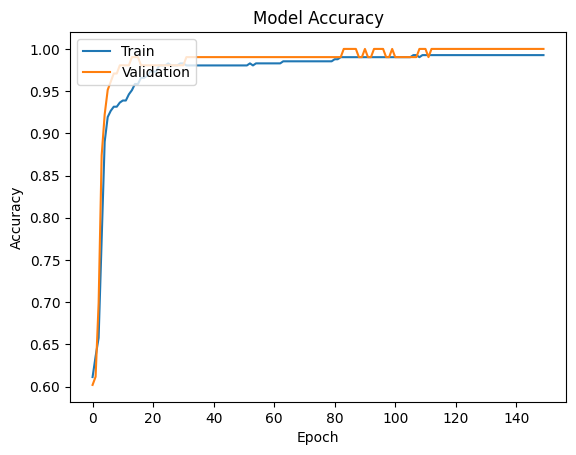

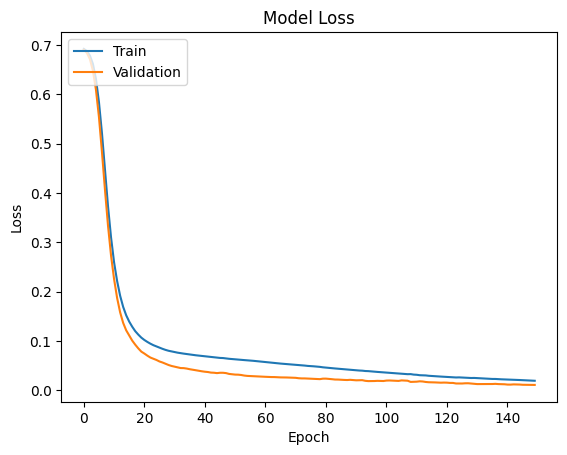

In [ ]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy']) # Access history from the 'history' object
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss']) # Access history from the 'history' object
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)   # 0 - 1
y_pred = (y_pred >= 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


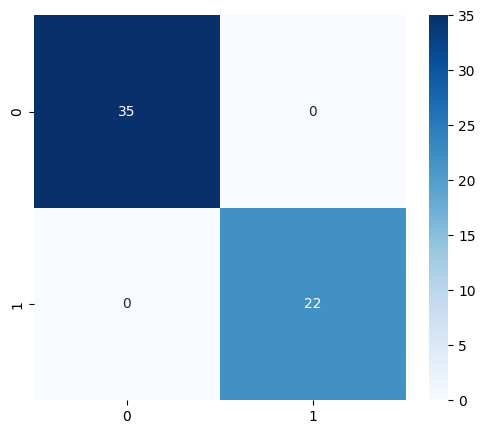

In [ ]:
# Confusion matrix with blue colors wiyh 6*5 fig size

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.show()


In [ ]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        35
           1     1.0000    1.0000    1.0000        22

    accuracy                         1.0000        57
   macro avg     1.0000    1.0000    1.0000        57
weighted avg     1.0000    1.0000    1.0000        57

